In [ ]:
96123#pip install gdown

In [ ]:
#url = 'https://drive.google.com/uc?id=1-5HoIvDe-mOW-n2Bqn0YsBf41DbraS7c'

In [ ]:
output_file ='dataset.zip'

In [ ]:
import gdown
gdown.download(url,output_file,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-5HoIvDe-mOW-n2Bqn0YsBf41DbraS7c
To: /content/dataset.zip
100%|██████████| 228M/228M [00:03<00:00, 74.9MB/s]


'dataset.zip'

In [ ]:
!cp '/content/dataset.zip' '/content/drive/MyDrive/DL_class/cnn_data/'

In [ ]:
!cp '/content/drive/MyDrive/DL_class/cnn_data/dataset.zip' '/content/'

In [ ]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/cat_dog_dataset/cat/cat.1018.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1817.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2224.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4839.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4055.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4851.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2483.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4127.jpg  
  inflating: content/cat_dog_dataset/cat/cat.3377.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4770.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1310.jpg  
  inflating: content/cat_dog_dataset/cat/cat.508.jpg  
  inflating: content/cat_dog_dataset/cat/cat.283.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1209.jpg  
  inflating: content/cat_dog_dataset/cat/cat.1312.jpg  
  inflating: content/cat_dog_dataset/cat/cat.2362.jpg  
  inflating: content/cat_dog_dataset/cat/cat.4333.jpg  

**Training image classification network - CNN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
dataset_path = '/content/content/cat_dog_dataset'

In [ ]:
# define hyperparameters

batch_size = 32
epochs = 10
image_size = (150,150)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [ ]:
training_generator = train_datagen.flow_from_directory(
      dataset_path,
      target_size = image_size,
      batch_size = batch_size,
      class_mode = 'binary',
      subset = 'training'
)

Found 8000 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
      dataset_path,
      target_size = image_size,
      batch_size = batch_size,
      class_mode = 'binary',
      subset = 'validation'
)

Found 2000 images belonging to 2 classes.


In [ ]:
model = Sequential()

#convolution filters
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))

#pooling layer
model.add(MaxPooling2D(2,2))
#28*28 pixel image


#fully connected layer
model.add(Flatten())
#784 units
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(
        training_generator,
        steps_per_epoch = training_generator.samples // batch_size,
        validation_data = validation_generator,
        validation_steps = validation_generator.samples // batch_size,
        epochs = epochs

)

Epoch 1/10
250/250 [==============================] - 32s 86ms/step - loss: 0.7658 - accuracy: 0.6321 - val_loss: 0.5859 - val_accuracy: 0.7011
Epoch 2/10
250/250 [==============================] - 18s 72ms/step - loss: 0.4515 - accuracy: 0.7943 - val_loss: 0.6168 - val_accuracy: 0.6895
Epoch 3/10
250/250 [==============================] - 19s 78ms/step - loss: 0.2852 - accuracy: 0.8854 - val_loss: 0.6770 - val_accuracy: 0.7051
Epoch 4/10
250/250 [==============================] - 19s 78ms/step - loss: 0.1464 - accuracy: 0.9505 - val_loss: 0.8573 - val_accuracy: 0.6956
Epoch 5/10
250/250 [==============================] - 17s 69ms/step - loss: 0.0653 - accuracy: 0.9855 - val_loss: 1.0126 - val_accuracy: 0.6930
Epoch 6/10
250/250 [==============================] - 18s 70ms/step - loss: 0.0385 - accuracy: 0.9926 - val_loss: 1.1071 - val_accuracy: 0.6835
Epoch 7/10
250/250 [==============================] - 20s 79ms/step - loss: 0.0157 - accuracy: 0.9976 - val_loss: 1.2983 - val_accuracy:

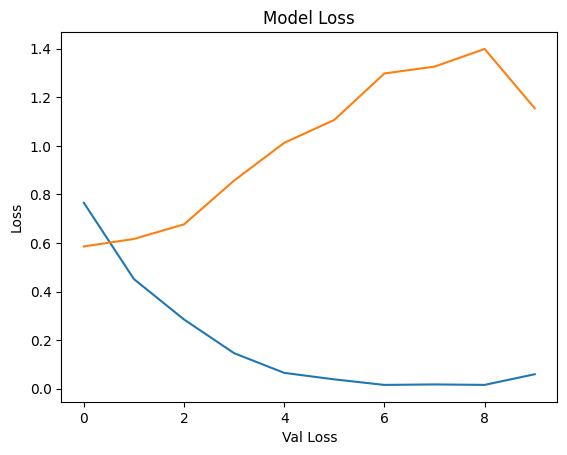

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Val Loss')
plt.show()

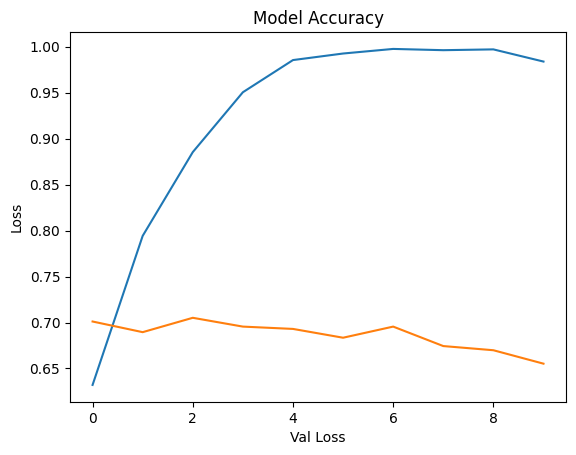

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Val Loss')
plt.show()

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))
model_2.add(MaxPooling2D(2,2))

model_2.add(Conv2D(64,(3,3),activation='relu'))
model_2.add(MaxPooling2D(2,2))

model_2.add(Conv2D(128,(3,3),activation='relu'))
model_2.add(MaxPooling2D(2,2))

#fully connected layer
model_2.add(Flatten())
#784 units
model_2.add(Dense(512,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))


In [ ]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(
          training_generator,
        steps_per_epoch = training_generator.samples // batch_size,
        validation_data = validation_generator,
        validation_steps = validation_generator.samples // batch_size,
        epochs = epochs


)

Epoch 1/10
250/250 [==============================] - 23s 82ms/step - loss: 0.6552 - accuracy: 0.6109 - val_loss: 0.5766 - val_accuracy: 0.7036
Epoch 2/10
250/250 [==============================] - 20s 82ms/step - loss: 0.5671 - accuracy: 0.7010 - val_loss: 0.5491 - val_accuracy: 0.7263
Epoch 3/10
250/250 [==============================] - 22s 88ms/step - loss: 0.5070 - accuracy: 0.7533 - val_loss: 0.5818 - val_accuracy: 0.7006
Epoch 4/10
250/250 [==============================] - 21s 83ms/step - loss: 0.4573 - accuracy: 0.7805 - val_loss: 0.5288 - val_accuracy: 0.7490
Epoch 5/10
250/250 [==============================] - 20s 81ms/step - loss: 0.4010 - accuracy: 0.8200 - val_loss: 0.5201 - val_accuracy: 0.7782
Epoch 6/10
250/250 [==============================] - 20s 81ms/step - loss: 0.3143 - accuracy: 0.8595 - val_loss: 0.5081 - val_accuracy: 0.7828
Epoch 7/10
250/250 [==============================] - 20s 81ms/step - loss: 0.2128 - accuracy: 0.9128 - val_loss: 0.5461 - val_accuracy:

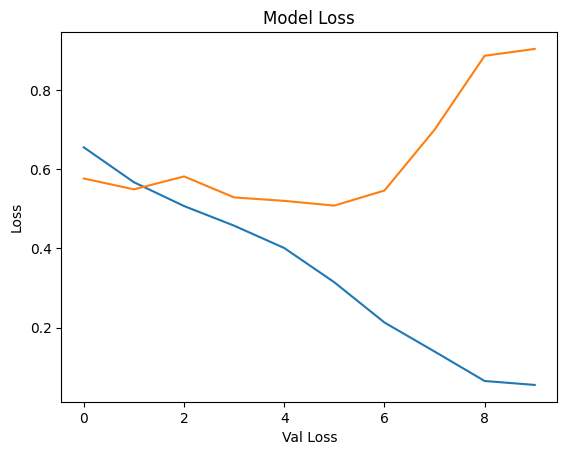

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Val Loss')
plt.show()

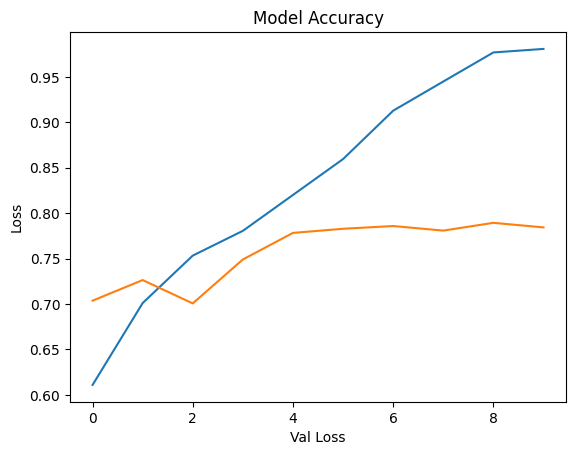

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Val Loss')
plt.show()

In [ ]:
model_2.save('cat_dog_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

from tensorflow.keras.preprocessing import image

def predict_image(image_path):
    img = image.load_img(image_path,target_size = image_size)
    img = image.img_to_array(img) # converting to array
    img = np.expand_dims(img,axis = 0) # expanding dims to match for model
    img /=255.0 # normalize
    prediction = model.predict(img)

    return "Cat" if prediction < 0.5 else "Dog"





In [ ]:
img = '/content/pug.jpg'


In [ ]:

prediction = predict_image(img)
print(prediction)


1/1 [==============================] - 0s 20ms/step
Dog
